ref: https://github.com/OlenaKulchytska/ComputerVision/blob/main/Lab2/Lab2_CV.ipynb

In [45]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import argparse
import math
import cv2
from skimage.feature import hog

In [46]:
def gloh_detect(img1, img2):
    gray_img1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
    gray_img2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
    
    descriptions1 = hog(gray_img1.reshape(*gray_img1.shape, 1), orientations=8, pixels_per_cell=(8, 8),
                    cells_per_block=(1, 1), channel_axis=-1, feature_vector=False)
    keypoints1 = generate_kp(*gray_img1.shape, *descriptions1.shape[:2])
    
    descriptions2 = hog(gray_img2.reshape(*gray_img2.shape, 1), orientations=8, pixels_per_cell=(8, 8),
                    cells_per_block=(1, 1), channel_axis=-1, feature_vector=False)
    keypoints2 = generate_kp(*gray_img2.shape, *descriptions2.shape[:2])
    
    descriptions1 = descriptions1.reshape(descriptions1.shape[0]*descriptions1.shape[1], -1)
    descriptions2 = descriptions2.reshape(descriptions2.shape[0]*descriptions2.shape[1], -1)

    print("Keypoints: {}, descriptors: {}".format(len(keypoints1), descriptions1.shape))
    print("Keypoints: {}, descriptors: {}".format(len(keypoints2), descriptions2.shape)) 
    return keypoints1, descriptions1.astype(np.float32), keypoints2, descriptions2.astype(np.float32)

In [47]:
def generate_kp(h, w, ph, pw):
    h_step = h / ph
    w_step = w / pw
    current_h = 0
    kp = []
    while current_h < h - h_step/2:
        current_w = 0
        while current_w < w - w_step/2:
            kp.append(cv.KeyPoint(int(current_w + w_step/2), int(current_h + h_step/2), size=1))
            current_w += w_step
        current_h += h_step
    return kp

In [48]:
def brute_force_opencv_matcher(kps1, descs1, kps2, descs2,img1, img2):
    bf = cv.BFMatcher(cv.NORM_L1)
    matches = bf.knnMatch(descs1,descs2, k=2)    # typo fixed

    # Apply ratio Lowe's test
    good = []
    for m,n in matches:
        if m.distance < 0.75*n.distance:
            good.append([m])

    # cv2.drawMatchesKnn expects list of lists as matches.
    img3 = cv.drawMatchesKnn(img1, kps1, img2, kps2, good[:20], None, flags=2)
    plt.figure(figsize=(20,20))
    plt.imshow(img3) 
    plt.show()

In [49]:
book = cv.imread('data/book.png')
books = cv.imread('data/books.png')

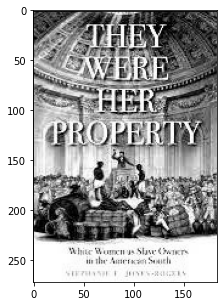

In [50]:
plt.figure(figsize=(5,5))
plt.imshow(book, cmap='gray')

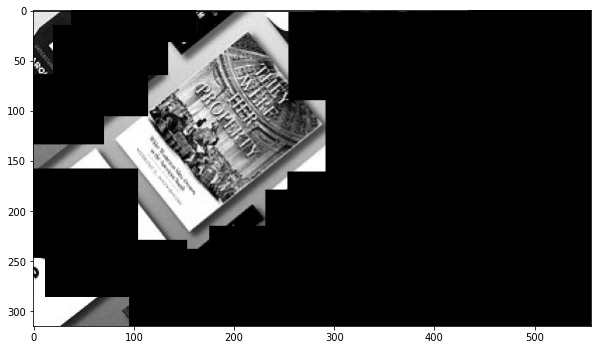

In [51]:
plt.figure(figsize=(10,10))
plt.imshow(books, cmap='gray')

In [52]:
kps1, descs1, kps2, descs2 = gloh_detect(book, books)

Keypoints: 782, descriptors: (782, 8)
Keypoints: 2691, descriptors: (2691, 8)


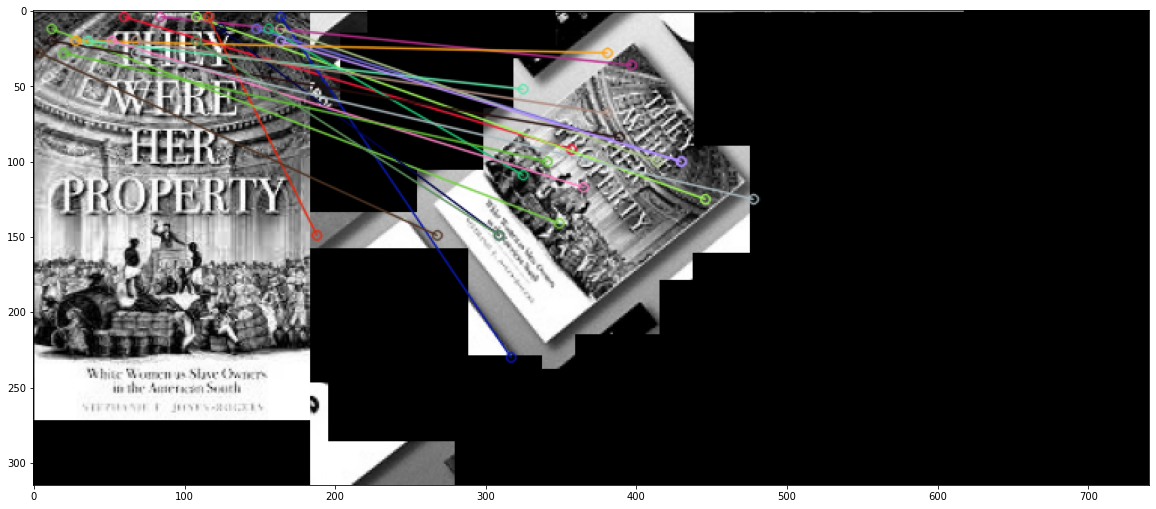

In [53]:
brute_force_opencv_matcher(kps1, descs1, kps2, descs2, book, books)